In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdatesJ
from matplotlib.dates import DateFormatter

In [384]:
Etf=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Inst%20ETF.csv?token=GHSAT0AAAAAABROZZ62LUZBZWCANVXWLXYGYQ6PCIA')
Institutional=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Institutional%20MF.csv?token=GHSAT0AAAAAABROZZ627EZDQVMQKRV7VL5UYQ6PCPA') 
Retail=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Retail%20MF.csv?token=GHSAT0AAAAAABROZZ62SVTK7JQNRR6372LUYQ6PCXQ')
sp500=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/sp500index.csv?token=GHSAT0AAAAAABROZZ63CQAUFDLJ2BUUKBNAYQ6PDAQ')

# Cleaning data

In [14]:
# Drop infrastructure in 3 of the datasets
rows_to_drop = ["Infrastructure-North America-USA-North America-Equity"]
condition_etf = ~Etf["AssetClass"].isin(rows_to_drop)
condition_institutional = ~Institutional["AssetClass"].isin(rows_to_drop)
condition_retail = ~Retail["AssetClass"].isin(rows_to_drop)

etf = Etf[condition_etf]
institutional = Institutional[condition_institutional]
retail = Retail[condition_retail]


# Creating labels for logistic regression classification model

The lable will be created by first getting the rolling average of asset end in 25 weeks


In [5]:
def get_rolling_average(table,window_length):
  result=pd.DataFrame(columns=table.columns)
  for i in table['AssetClass'].unique():
    Retailrolling=table[table['AssetClass']==i]
    Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd'].mean()
    result=pd.concat([result,Retailrolling])
  return result

def get_label(table_orginal):

  def get_label_inner_function(change):
    if change>0.05:
      return 1
    elif change<-0.05:
      return -1
    else:
      return 0
  
  table=table_orginal
  table['change']=table['rollingaverage']/table['AssetsEnd']-1
  table['label']=table['change'].apply(get_label_inner_function)
  table_orginal['label']=table['label']
  return table_orginal

In [19]:
etf=get_rolling_average(etf,25)
etf=get_label(etf)

institutional=get_rolling_average(institutional,25)
institutional=get_label(institutional)

retail=get_rolling_average(retail,25)
retail=get_label(retail)

C:\Users\LinhTo\AppData\Local\Temp/ipykernel_18704/3792281932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd'].mean()
C:\Users\LinhTo\AppData\Local\Temp/ipykernel_18704/3792281932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd

In [16]:
retail.head(30)

,ReportDate,AssetClass,Flow,FlowPct,AssetsEnd,PortfolioChangePct,rollingaverage,change,label
0,2/1/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,25.681524,8.0046,344.521230,-0.6207,NaN,NaN,0
20,1/25/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,9.273380,3.0423,320.831206,2.2149,NaN,NaN,0
40,1/18/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,0.974254,0.3198,304.806241,-0.2577,NaN,NaN,0
60,1/11/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-5.155908,-1.6780,304.617006,0.8178,NaN,NaN,0
80,1/4/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-16.851581,-5.2997,307.259928,1.9309,NaN,NaN,0
100,12/28/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-3.326958,-1.0383,317.971754,0.2768,NaN,NaN,0
120,12/21/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,0.843272,0.2636,320.411750,-0.0964,NaN,NaN,0
140,12/14/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,3.501891,1.0855,319.876922,-1.9230,NaN,NaN,0
160,12/7/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,28.262530,9.7727,322.578359,1.7696,NaN,NaN,0
180,11/30/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,2.322618,0.8147,289.197942,0.6295,NaN,NaN,0


### MA25 for every sectors

<AxesSubplot:xlabel='ReportDate', ylabel='rollingaverage'>

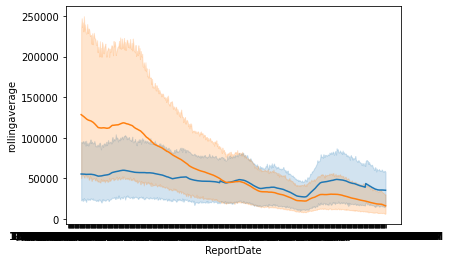

In [20]:
import seaborn as sns 

# may_flights = flights.query("month == 'May'")
sns.lineplot(data=retail, x="ReportDate", y="rollingaverage")
sns.lineplot(data=institutional, x="ReportDate", y="rollingaverage")

## Logistic regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression   # choose model class

In [49]:
etf.dropna()
institutional.dropna()
retail.dropna()

# Predictor X
X_etf = etf.drop(["ReportDate", 'AssetClass', 'rollingaverage','change', 'label'],  axis = 1)
X_institutional = institutional.drop(["ReportDate", 'AssetClass', 'rollingaverage','change', 'label'],  axis = 1)
X_retail = retail.drop(["ReportDate", 'AssetClass', 'rollingaverage','change', 'label'],  axis = 1)

# Response y
y_etf = etf['label']
y_institutional = institutional['label']
y_retail = retail['label']

# Split the test and train sets 
# Use a 20% split for test.

Xtrain_etf, Xtest_etf, ytrain_etf, ytest_etf = train_test_split(X_etf, y_etf, test_size=0.2, random_state=888)
Xtrain_institutional, Xtest_institutional, ytrain_institutional, ytest_institutional = train_test_split(X_institutional, y_institutional, test_size=0.2, random_state=888)
Xtrain_retail, Xtest_retail, ytrain_retail, ytest_retail = train_test_split(X_retail, y_retail, test_size=0.2, random_state=888)

model = LogisticRegression(solver='liblinear')       # instantiate model

# Fit model to the training data:
model_etf = model.fit(Xtrain_etf, ytrain_etf)
model_institutional = model.fit(Xtrain_institutional, ytrain_institutional)
model_retail = model.fit(Xtrain_retail, ytrain_retail)


# Predict the test set
y_model_etf = model.predict(Xtest_etf)
y_model_institutional = model.predict(Xtest_institutional)
y_model_retail = model.predict(Xtest_retail)

# Confusion matrix
print('Report for etf\n', classification_report(ytest_etf, y_model_etf))
print('Report for institutional\n', classification_report(ytest_institutional, y_model_institutional))
print('Report for retail\n', classification_report(ytest_retail, y_model_retail))


# Accuracy
# print(accuracy_score(ytest, y_model))

Report for etf
               precision    recall  f1-score   support

          -1       0.20      0.29      0.24       349
           0       0.49      0.33      0.40       729
           1       0.54      0.56      0.55      1123

    accuracy                           0.44      2201
   macro avg       0.41      0.40      0.39      2201
weighted avg       0.47      0.44      0.45      2201

Report for institutional
               precision    recall  f1-score   support

          -1       0.17      0.23      0.20       305
           0       0.49      0.57      0.53       798
           1       0.56      0.45      0.50      1098

    accuracy                           0.46      2201
   macro avg       0.41      0.41      0.41      2201
weighted avg       0.48      0.46      0.47      2201

Report for retail
               precision    recall  f1-score   support

          -1       0.31      0.14      0.19       419
           0       0.55      0.58      0.56       949
           1  